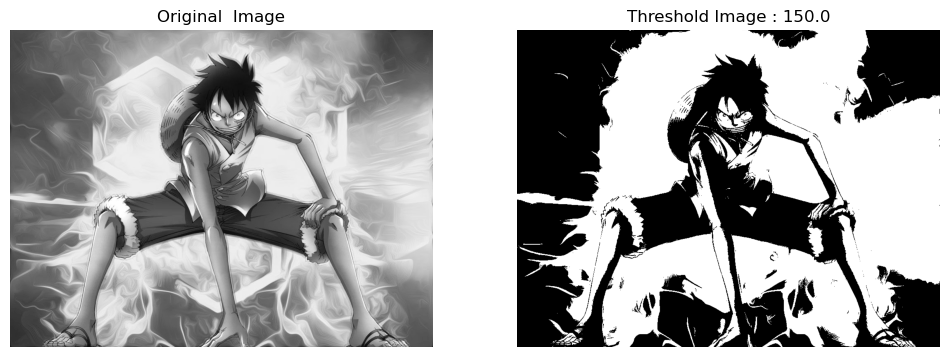

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread(r"C:\Users\k.navadeepreddy\Downloads\luffy2.jpg",0)
thresh,binary_image=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original  Image'),plt.axis('off')
plt.subplot(122),plt.imshow(binary_image,cmap='gray'),plt.title(f'Threshold Image : {thresh}'),plt.axis('off')
plt.show()

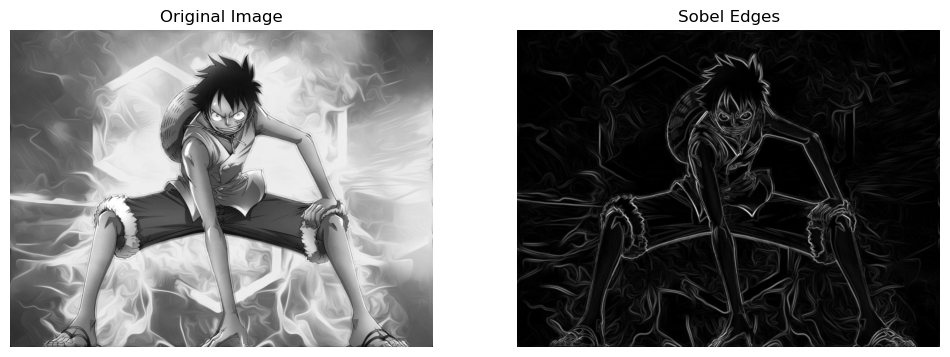

In [2]:
sobel_x=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=7)
sobel_y=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=7)
sobel_edges=np.sqrt(sobel_x**2+sobel_y**2)
sobel_edges=cv2.normalize(sobel_edges,None,0,255,cv2.NORM_MINMAX).astype(np.uint8)
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(sobel_edges,cmap='gray'),plt.title('Sobel Edges'),plt.axis('off')
plt.show()

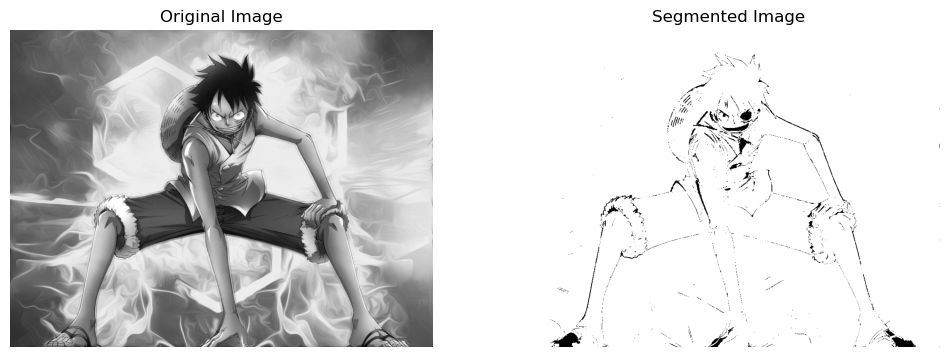

In [3]:
def region_growing(img,seed,th=10):
    h,w=img.shape
    seg=np.zeros((h,w),dtype=np.uint8)
    seed_list=[seed]
    seg[seed]=255
    while seed_list:
        current=seed_list.pop(0)
        x,y=current
        for dx in [-1,0,1]:
            for dy in [-1,0,1]:
                nx,ny=x+dx,y+dy
                if 0<=nx<h and 0<=ny<w:
                    if seg[nx,ny]==0:
                        if abs(int(img[nx,ny])-int(img[x,y]))<th:
                            seg[nx,ny]=255
                            seed_list.append((nx,ny))
    return seg
seed_point=(626,526)
seg_img=region_growing(img,seed_point,th=17)
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(seg_img,cmap='gray'),plt.title('Segmented Image'),plt.axis('off')
plt.show()

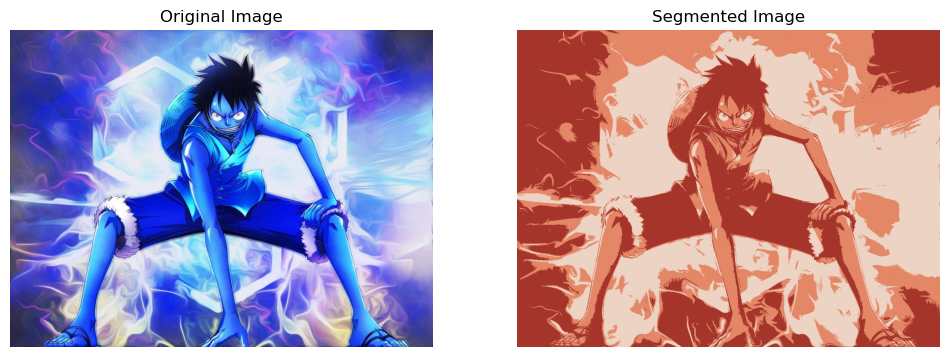

In [4]:
img=cv2.imread(r"C:\Users\k.navadeepreddy\Downloads\luffy2.jpg")
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pixles=img_rgb.reshape((-1,3)).astype(np.float32)
k=3
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
_,labels,centers=cv2.kmeans(pixles,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
centers=np.uint8(centers)
segmented_image=centers[labels.flatten()].reshape(img_rgb.shape)
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(segmented_image),plt.title('Segmented Image'),plt.axis('off')
plt.show()

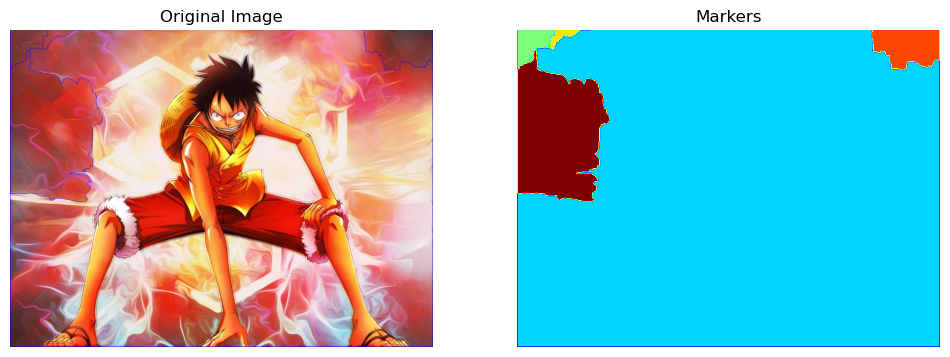

In [5]:
img=cv2.imread(r"C:\Users\k.navadeepreddy\Downloads\luffy2.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
sure_bg=cv2.dilate(opening,kernel,iterations=3)
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
_,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)
_,markers=cv2.connectedComponents(sure_fg)
markers=markers+1
markers[unknown==255]=0
markers=cv2.watershed(img,markers)
img[markers==-1]=[255,0,0]
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(markers,cmap='jet'),plt.title('Markers'),plt.axis('off')
plt.show()

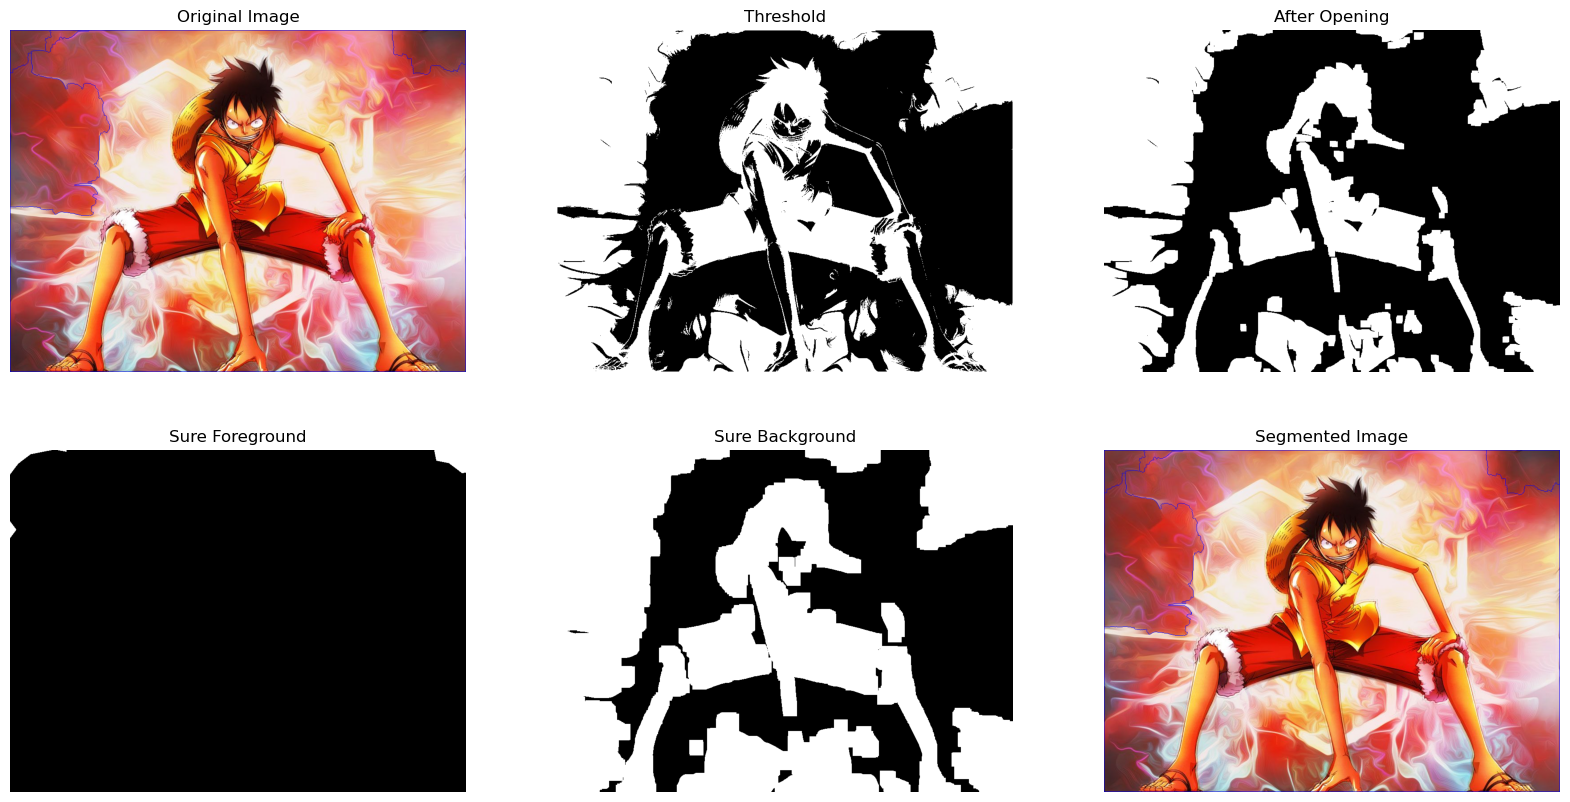

In [6]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh=cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((7,7),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
sure_bg=cv2.dilate(opening,kernel,iterations=3)
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
_,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_fg)
_,markers=cv2.connectedComponents(sure_fg)
markers=markers+1
markers[unknown==255]=0
markers=cv2.watershed(img,markers)
img[markers==-1]=[255,0,0]
plt.figure(figsize=(20,10))
plt.subplot(231),plt.imshow(img_rgb),plt.title('Original Image'),plt.axis('off')
plt.subplot(232),plt.imshow(thresh,cmap='gray'),plt.title('Threshold'),plt.axis('off')
plt.subplot(233),plt.imshow(opening,cmap='gray'),plt.title('After Opening'),plt.axis('off')
plt.subplot(234),plt.imshow(sure_fg,cmap='gray'),plt.title('Sure Foreground'),plt.axis('off')
plt.subplot(235),plt.imshow(sure_bg,cmap='gray'),plt.title('Sure Background'),plt.axis('off')
plt.subplot(236),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Segmented Image'),plt.axis('off')
plt.show()

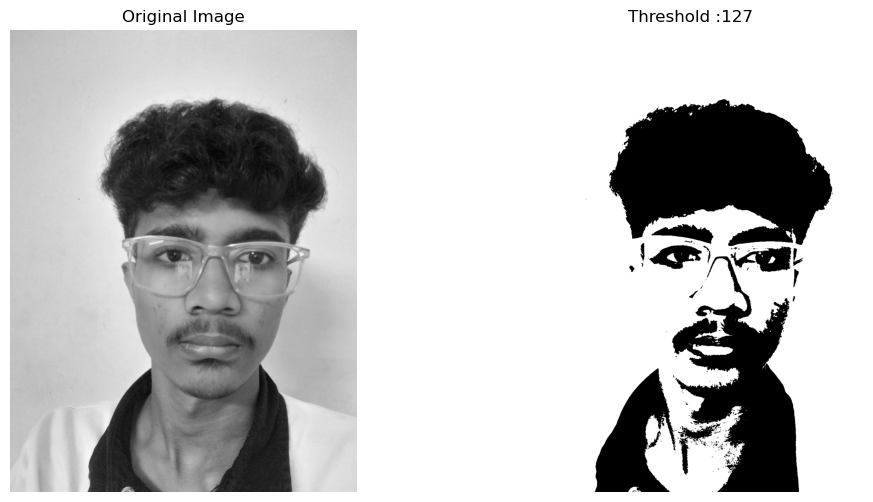

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread(r"C:\Users\k.navadeepreddy\OneDrive\Pictures\Screenshots\hh.jpg",0)
threshold=127
_,binary_image=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(binary_image,cmap='gray'),plt.title(f'Threshold :{threshold}'),plt.axis('off')
plt.show()

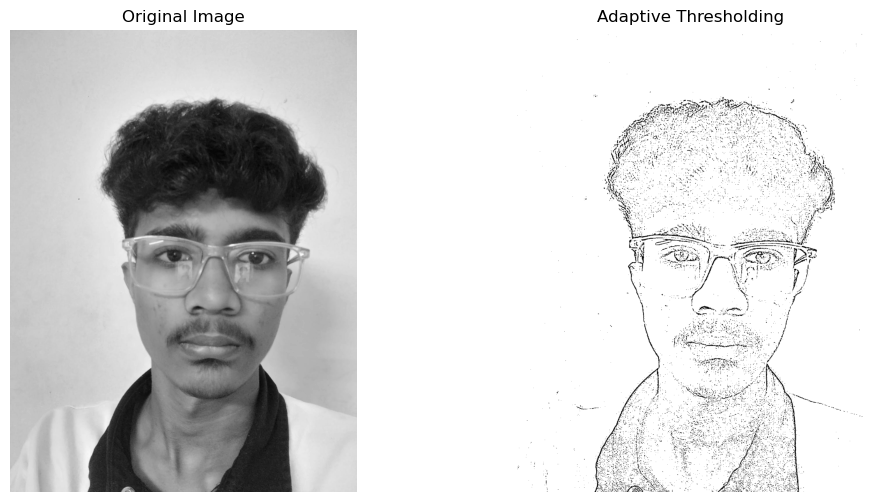

In [8]:
adaptive_image=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,4)
plt.figure(figsize=(12,6))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(adaptive_image,cmap='gray'),plt.title('Adaptive Thresholding'),plt.axis('off')
plt.show()

In [9]:
image = np.array([
    [10, 10, 10, 10, 10, 10, 10],
    [10, 10, 10, 69, 70, 10, 10],
    [59, 10, 60, 64, 59, 56, 60],
    [10, 59, 10, 60, 70, 10, 62],
    [10, 60, 59, 65, 67, 10, 65],
    [10, 10, 10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10, 10, 10]
])
def rg(image,seed,thresh=5):
    rows,cols=image.shape
    segmented=np.zeros_like(image,dtype=bool)
    seed_value=image[seed[0],seed[1]]
    queue=[seed]
    segmented[seed[0],seed[1]]=True
    directions=[(0,1),(1,0),(0,-1),(-1,0)]
    while queue:
        current=queue.pop(0)
        for dx,dy in directions:
            x,y=current[0]+dx,current[1]+dy
            if(0<=x<rows and 0<=y<cols and not segmented[x,y] and abs(int(image[x,y])-int(seed_value))<=thresh):
                segmented[x,y]=True
                queue.append((x,y))
    return segmented
seed=(3,3)
result=rg(image,seed)
print("Segmented Region (True = part of region):")
print(result.astype(int))

Segmented Region (True = part of region):
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1]
 [0 1 0 1 0 0 1]
 [0 1 1 1 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


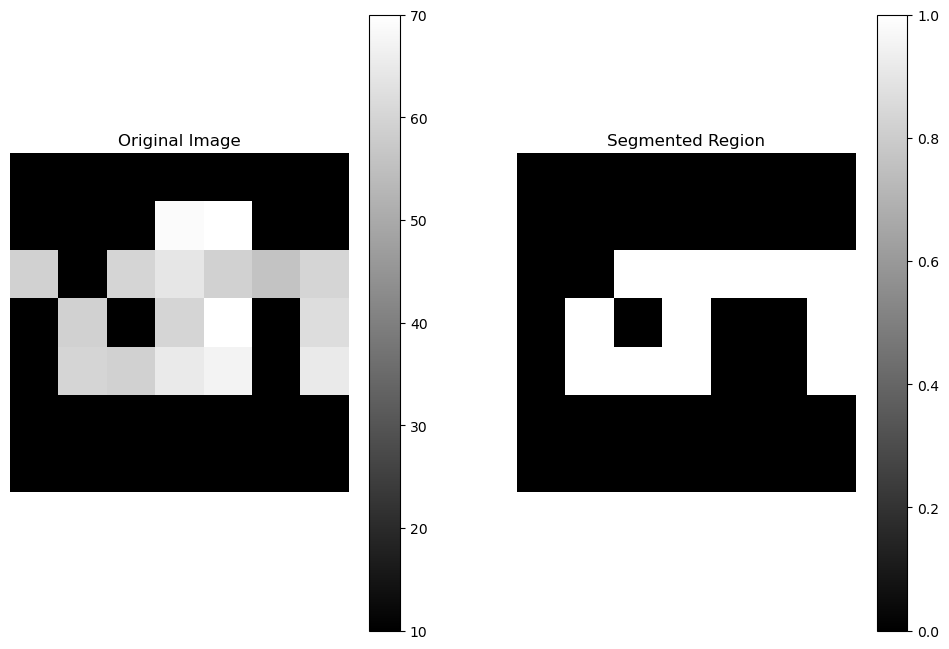

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(image,cmap='gray'),plt.title('Original Image'),plt.colorbar(),plt.axis('off')
plt.subplot(122),plt.imshow(result,cmap='gray'),plt.title('Segmented Region'),plt.colorbar(),plt.axis('off')
plt.show()

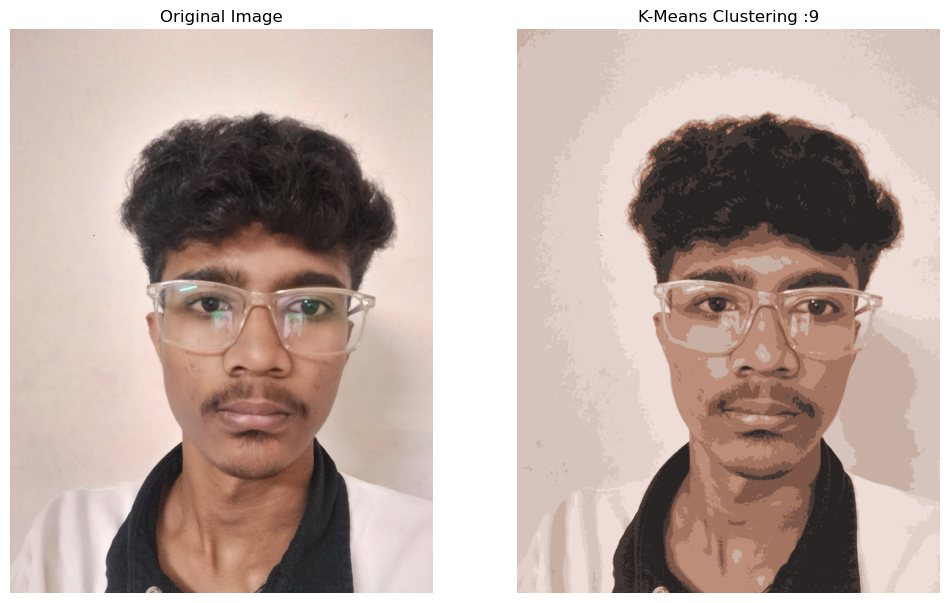

In [12]:
img=cv2.imread(r"C:\Users\k.navadeepreddy\OneDrive\Pictures\Screenshots\hh.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
pixels=img.reshape(-1,3).astype(np.float32)
K=9
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
_,labels,centers=cv2.kmeans(pixels,K,None,criteria,15,cv2.KMEANS_RANDOM_CENTERS)
centers=centers.astype(np.uint8)
segmented_image=centers[labels.flatten()].reshape(img.shape)
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(segmented_image),plt.title(f'K-Means Clustering :{K}'),plt.axis('off')
plt.show()

(<Axes: title={'center': 'Distance Transform'}>,
 Text(0.5, 1.0, 'Distance Transform'),
 (-0.5, 329.5, 219.5, -0.5))

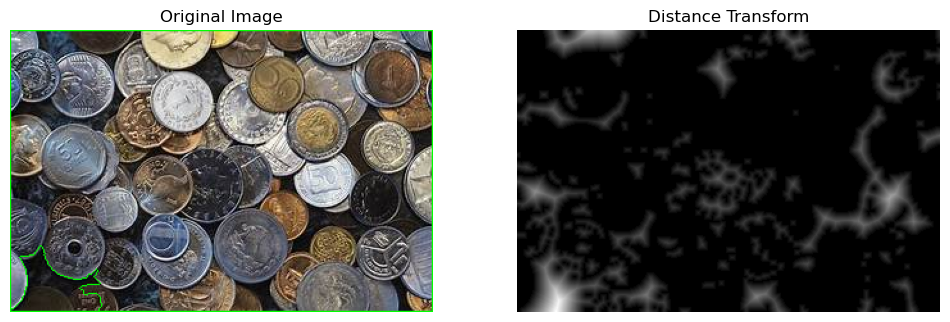

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread(r"C:\Users\k.navadeepreddy\OneDrive\Pictures\coins.jpeg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,binary=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel,iterations=2)
sure_bg=cv2.dilate(opening,kernel,iterations=3)
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
_,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg=np.uint8(sure_fg)
unknown=np.subtract(sure_bg,sure_fg)
_,markers=cv2.connectedComponents(sure_fg)
markers=markers+1
markers[unknown==255]=0
markers=cv2.watershed(img,markers)
img[markers==-1]=[0,255,0]
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Original Image'),plt.axis('off')
plt.subplot(122),plt.imshow(dist_transform,cmap='gray'),plt.title('Distance Transform'),plt.axis('off')

(<Axes: title={'center': 'Watershed Segmentation'}>,
 Text(0.5, 1.0, 'Watershed Segmentation'),
 (-0.5, 99.5, 99.5, -0.5))

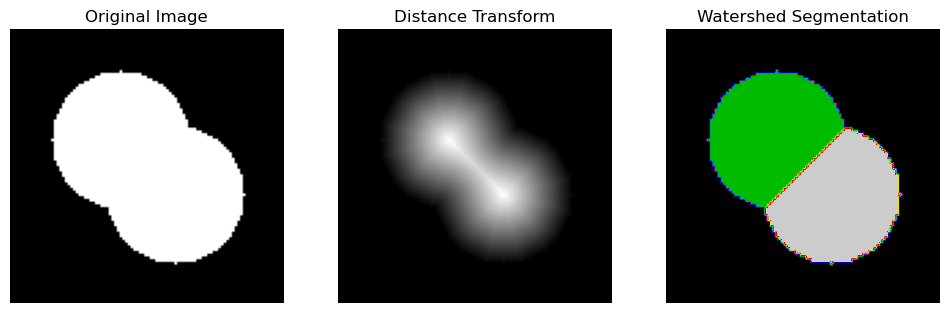

In [13]:
from skimage import segmentation
from scipy.ndimage import distance_transform_edt
image=np.zeros((100,100),np.uint8)
y,x=np.ogrid[:100,:100]
circel1=(x-40)**2+(y-40)**2<=25**2
circel2=(x-60)**2+(y-60)**2<=25**2
image[circle1|circle2]=255
distance=distance_transform_edt(image)
markers=np.zeros_like(image)
markers[40,40]=1
markers[60,60]=2
labels=segmentation.watershed(-distance,markers,mask=image)
plt.figure(figsize=(12,8))
plt.subplot(131),plt.imshow(image,cmap='gray'),plt.title('Original Image'),plt.axis('off')
plt.subplot(132),plt.imshow(distance,cmap='gray'),plt.title('Distance Transform'),plt.axis('off')
plt.subplot(133),plt.imshow(labels,cmap='nipy_spectral'),plt.title('Watershed Segmentation'),plt.axis('off')